In [2]:
import sys
sys.path.insert(0, '..')
from utils import load_npy_image, load_tiff_image
import os
import matplotlib.pyplot as plt
import numpy as np
from preprocess_save_patches_Amazon import mask_no_considered
from skimage.util.shape import view_as_windows
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import cv2

In [3]:
root_path = '/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new'
# Load images --------------------------------------------------------------
img_t1_path = 'cut_raster_2018_ok.tif'
img_t2_path = 'cut_raster_2019_ok.tif'
img_t1 = load_tiff_image(os.path.join(root_path, img_t1_path))
print(type(img_t1))
img_t2 = load_tiff_image(os.path.join(root_path, img_t2_path))
print(img_t1.shape)
print(img_t2.shape)

/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new/cut_raster_2018_ok.tif
<class 'numpy.ndarray'>
/media/thimabru/ssd/TCC/imagens_satelite_dataset/cut_img_66_new/cut_raster_2019_ok.tif
(7, 5222, 5043)
(7, 5222, 5043)


In [4]:
# Convert shape from C x H x W --> H x W x C
# Convert from float32 to uint8
img_t1 = img_t1.transpose((1, 2, 0))
img_t2 = img_t2.transpose((1, 2, 0))
input_image = np.concatenate((img_t1, img_t2), axis=-1)
# img_train_normalized = normalization(img_train)
print('Image 7 bands')
print(img_t1.shape)
print(img_t1.dtype)
print(img_t2.shape)
print(img_t2.dtype)
print(input_image.shape)
print(input_image.dtype)
print(img_t1.min(), img_t1.max())

Image 7 bands
(5222, 5043, 7)
uint16
(5222, 5043, 7)
uint16
(5222, 5043, 14)
uint16
4058 65535


In [5]:
img_t1_bgr = (img_t1[:, :, 1:4]).astype(np.uint8)
img_t1_rgb = img_t1_bgr[:, :, ::-1]
print(img_t1_rgb.min(), img_t1_rgb.max())

0 255


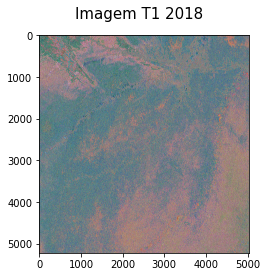

In [6]:
fig = plt.figure()
fig.suptitle('Imagem T1 2018', fontsize=15)
plt.imshow(img_t1_bgr)